# Ejercicio 1:

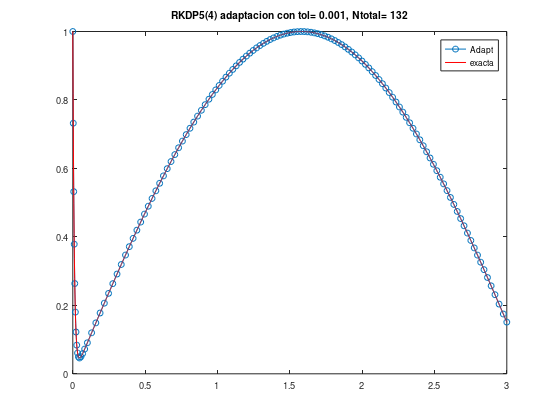

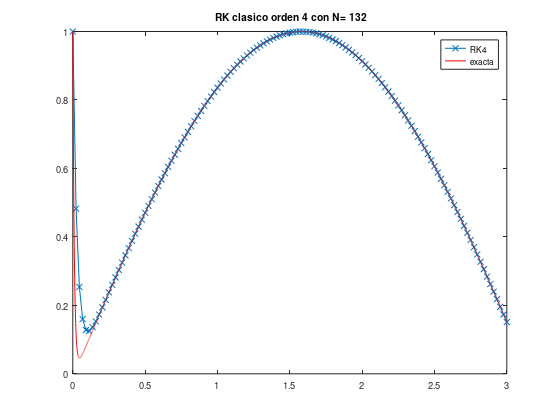

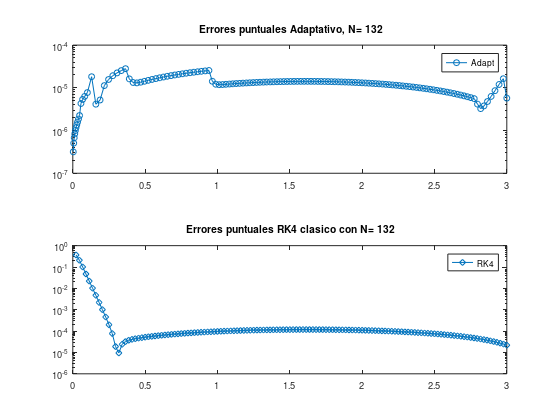

In [5]:
warning("off")
%
% RK Dorman-Prince 5(4)
% Ecuacion de Dalquist-Bjork
%
%
clear all;
close all;
a=100;
t0=0; %Tiempo inicial
T=3;
Tfin=t0+T;  %Tiempo final
N=1000; % Numero de puntos maximo 
t=zeros(1,N+1);% dimensionaliza t
t(1)=t0;

% Vector para Runge-Kutta 
y=zeros(1,N+1);% dimensionaliza y 
ytrue=zeros(1,N+1);% dimensionaliza ytrue
ytadapt=zeros(1,N+1);% dimensionaliza ytadapt 
y0=1.0; %Dato inicial
y(1)=y0;

 
% Solucion exacta en una particion fina

ttrue=t0:0.001:Tfin; %Particion fina
for i=1:size(ttrue,2)
ytrue(i)=DBsol(ttrue(i),a,y0);
end


% Coeficientes

c2 = 0.2; 
c3 = 0.3;
c4 = 0.8; 
c5 = 8/9.0;
c6 = 1.0;
c7 = 1.0;
     
beta1 = 35/384;
beta3 = 500/1113;
beta4 = 125/192;
beta5 = -2187/6784; 
beta6 = 11/84;
         
b1 = 5179/57600; 
b3 = 7571/16695; 
b4 = 393/640;
b5 = -92097/339200; 
b6 = 187/2100; 
b7 = 1/40;
    
a21 = 0.2;
a31 = 0.075; 
a32 = 0.225;
a41 = 44/45; 
a42 = -56/15; 
a43 = 32/9;
a51 = 19372/6561; 
a52 = -25360/2187; 
a53 = 64448/6561;
a54 = -212/729;
a61 = 9017/3168; 
a62 =-355/33; 
a63 = 46732/5247;
a64 = 49/176; 
a65 = -5103/18656;
a71 = 35/384; 
a73 = 500/1113; 
a74 = 125/192;
a75 = -2187/6784;
a76 = 11/84;
tol =1e-3;
n=1;% Para el primer tiempo y primer valor 
h=0.5; % Paso inicial 
Tau=1; % Truncatura inicial para entrar en el bucle

%while ((n<=N) && (t(n)<Tfin)&&(Tau>0))
  while ((n<=N) && (t(n)<Tfin))
k1 = DBfun(t(n),y(n),a);
k2 = DBfun(t(n)+c2*h,y(n)+h*a21*k1,a);
k3 = DBfun(t(n)+c3*h,y(n)+h*(a31*k1+ a32*k2),a);
k4 = DBfun(t(n)+c4*h,y(n)+h*(a41*k1+ a42*k2 + a43*k3),a);
k5 = DBfun(t(n)+c5*h,y(n)+h*(a51*k1+ a52*k2 + a53*k3 + a54*k4),a);
k6 = DBfun(t(n)+c6*h,y(n)+h*(a61*k1+ a62*k2 + a63*k3 + a64*k4 + a65*k5),a);
k7 = DBfun(t(n)+c7*h,y(n)+h*(a71*k1+ a73*k3 + a74*k4 + a75*k5 + a76*k6),a);  
%
% Incremento para la solucion de orden 5 
% dada por y(n) + dy
%        
%dy = h*(b1*k1 + b3*k3 + b4*k4 + b5*k5 + b6*k6 +b7*k7);
dy = h*(beta1*k1 + beta3*k3 + beta4*k4 + beta5*k5 + beta6*k6);
%
% Vemos los valores calculados 
%
tt=t(n)+h;
ytt=DBsol(tt,a,y0);
 #disp(['En tt = ',num2str(tt)]); 
 #disp(['ytrue = ',num2str(ytt),' yaprox (orden 5)= ',num2str(y(n) + dy)]);
  %
  % Estimamos el error local de truncatura 
  % haciendo la diferencia 
  % entre la solucion de orden 5 y la de orden 4
  %
  % Error local de truncatura es
  % 
Tau = abs((beta1-b1)*k1+(beta3-b3)*k3+(beta4-b4)*k4+(beta5-b5)*k5+(beta6-b6)*k6-b7*k7); 
#disp(['Tau = ',num2str(Tau)]);
%
% Aceptamos el paso dado y avanzamos
%
if  (Tau <= tol)
#disp([' ACEPTAMOS Y AVANZAMOS CON  h= ',num2str(h) ', a tt = ',num2str(t(n)+h)]); 
   y(n+1)=  y(n) + dy;
   t(n+1)=  t(n) + h;
   Nfin=n;
   #disp([' Tau<tol: t(n+1)= ',num2str(t(n+1))]);
   if (t(n+1)>=Tfin)% Se sobrepasa Tfin
       #disp(' t(n+1) sobrepasa Tfin==> ultima iteracion ');
   else % Si no se sobrepasa
       h=min(10*h,Tfin-t(n+1));
   #disp([' Tau<tol: min(10*h,Tfin-t(n+1))= ',num2str(h)]);
   end
   n=n+1;
   %pause;
end % Fin de trabajo cuando se acepta el paso
%
% tau>= tol....No aceptamos el paso dado
%              --> Recalculamos h y volvemos  
%              --->a obtener aproximacion para y(t(n)+h)
%
if  (Tau >= tol)
    Nfin=n;
%%
%% hNext =h*s
%% para ser usado si el error local de truncatura no es 
%% lo suficientemente pequeno
%%
hNext = 0.9*(tol/Tau)^(1/5.0)*h;
#disp([' tol = ',num2str(tol),' Tau = ',num2str(Tau)]);
#disp(['h = ',num2str(h),' hNext = ',num2str(hNext)]);
% Controlamos hNext
  if (hNext< 0.1*h) % Que no sea menor que 0.1*h   
    hNext = 0.1*h;
  end 
  if (hNext > 10*h) % Que no sea mayor que 10*h 
      hNext=10*h;
  end
  if (t(n) + hNext > Tfin)% Que no se sobrepase  t0+T 
    hNext = Tfin - t(n);
    
  end
   if(t(n) + hNext < Tfin)
     #disp([' RE-CALCULAMOS CON  hNext Ajustado = ',num2str(hNext)]);
   end
  h = hNext; % repetimos el trabajo con h=hNext
 end
%pause;
end 
%%
%% Figuras
%%

figure(1);
% subplot(2,1,1)
plot(t(1:Nfin+1),y(1:Nfin+1),'o-',ttrue,ytrue,'r-');
legend('Adapt','exacta','Location','Best');
title(['RKDP5(4) adaptacion con tol= ',num2str(tol), ', Ntotal= ',num2str(Nfin)]);
%
%
% Calculo solucion en la particion obtenida
%
for i=1:Nfin+1
ytadapt(i)=DBsol(t(i),a,y0);
end
err=abs(y(1:Nfin+1)-ytadapt(1:Nfin+1));
errmax=max(abs(y(1:Nfin+1)-ytadapt(1:Nfin+1)));
#disp([' Error global  = ',num2str(errmax),' tol  = ',num2str(tol)]);
#disp([' Ntotal  = ',num2str(Nfin)]);

%
% Calculo con RK4 clasico de orden 4 con el mismo numero de puntos
% particion uniforme
%
    h=T/Nfin;% talla de la particion
    tRK4=zeros(1,Nfin+1);% dimensionaliza t
    %tRK4(1)=t0;
    tRK4=t0:h:t0+T;
% Vector para Runge-Kutta orden 4
    yRK4=zeros(1,Nfin+1);% dimensionaliza y 
    yexactRK4=zeros(1,Nfin+1);% dimensionaliza ytadaptRK4
    yRK4(1)=y0;
    yexactRK4(1)=y0;
for n=1:Nfin
    %Calculo RK4
    k1=DBfun(tRK4(n),yRK4(n),a);
    k2=DBfun(tRK4(n)+h/2,yRK4(n)+h/2*k1,a);
    k3=DBfun(tRK4(n)+h/2,yRK4(n)+h/2*k2,a);
    k4=DBfun(tRK4(n)+h,yRK4(n)+h*k3,a);
    yRK4(n+1)=yRK4(n)+h*(k1+2*k2+2*k3+k4)/6;
    %tRK4(n+1)=tRK4(n)+h;
    yexactRK4(n+1)=DBsol(tRK4(n+1),a,y0);
end 
figure(2);
plot(tRK4,yRK4,'x-',ttrue,ytrue,'r-');
legend('RK4','exacta','Location','Best');
title([' RK clasico orden 4 con N= ',num2str(Nfin)]);
% plot(t(1:Nfin+1),y(1:Nfin+1),'o-',tRK4,yRK4,'x-',ttrue,ytrue,'r-');
% legend('Adapt','RK4','exacta','Location','Best');
% title([' Adaptacion vs RK4 clasico con N= ',num2str(Nfin)]);
%
% Valores exactos en la particion para RK4
%

errRK4=abs(yRK4(1:Nfin+1)-yexactRK4(1:Nfin+1));
figure(3);
subplot(2,1,1)
semilogy(t(1:Nfin+1),err(1:Nfin+1),'o-');
legend('Adapt','Location','Best');
title([' Errores puntuales Adaptativo, N= ',num2str(Nfin)]);
subplot(2,1,2)
semilogy(tRK4,errRK4,'d-');
legend('RK4','Location','Best');
title([' Errores puntuales RK4 clasico con N= ',num2str(Nfin)]);

# Runge-Kutta Fehlberg 4(5)

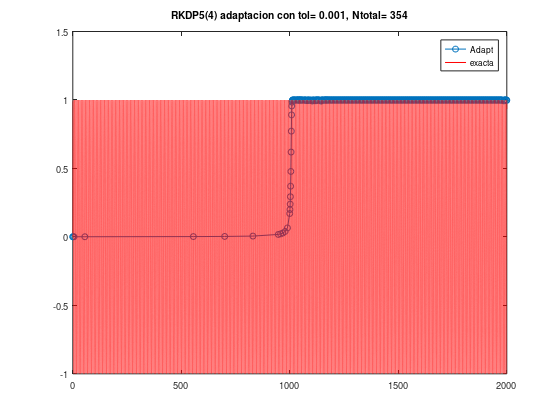

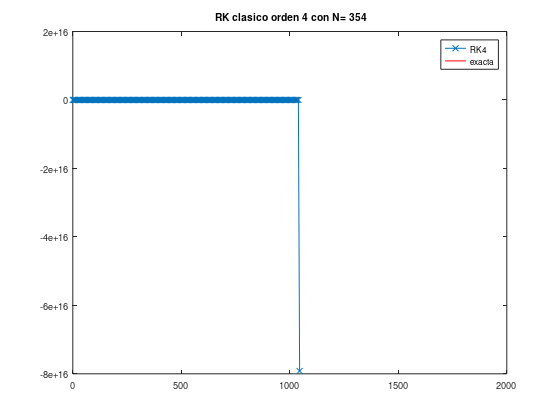

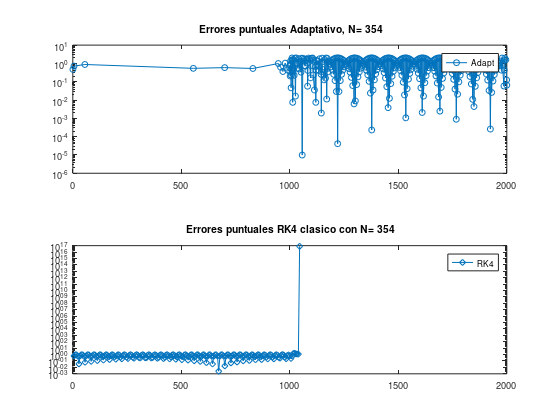

In [1]:
warning("off")
%
% Runge-Kutta Fehlberg 4(5)
%
clear all;
close all;
a=100;
t0=0; %Tiempo inicial
#T=3;
delta = 10**(-3);
T = 2/delta;
Tfin=t0+T;  %Tiempo final
N=1000; % Numero de puntos maximo 
t=zeros(1,N+1);% dimensionaliza t
t(1)=t0;


% Vector para Runge-Kutta 
y=zeros(1,N+1);% dimensionaliza y 
ytrue=zeros(1,N+1);% dimensionaliza ytrue
ytadapt=zeros(1,N+1);% dimensionaliza ytadapt 
#y0=1.0; %Dato inicial
y0 = delta;
y(1)=y0;

 
% Solucion exacta en una particion fina

ttrue=t0:0.001:Tfin; %Particion fina
for i=1:size(ttrue,2)
ytrue(i)=DBsol(ttrue(i),a,y0);
end


% Coeficientes

c2 = 0.25; 
c3 = 3/8.0;
c4 = 12/13.0; 
c5 = 1.0;
c6 = 0.5;
     
beta1 = 25/216;
beta3 = 1408/2565;
beta4 = 2197/4104;
beta5 = -1/5; 
         
b1 = 16/135; 
b3 = 6656/12825; 
b4 = 28561/56430;
b5 = -9/50; 
b6 = 2/55; 
    
a21 = 0.25;
a31 = 3/32.0; 
a32 = 9/32.0;
a41 = 1932/2197.0; 
a42 = -7200/2197; 
a43 = 7296/2197;
a51 = 439/216; 
a52 = -8.0; 
a53 = 3680/513;
a54 = -845/4104;
a61 = -8/27; 
a62 = 2.0; 
a63 = -3544/2565;
a64 = 1859/4104; 
a65 = -11/40;
tol =1e-3;
n=1;% Para el primer tiempo y primer valor 
h=0.5; % Paso inicial 
Tau=1; % Truncatura inicial para entrar en el bucle

%while ((n<=N) && (t(n)<Tfin)&&(Tau>0))
  while ((n<=N) && (t(n)<Tfin))
k1 = DBfun(t(n),y(n),a);
k2 = DBfun(t(n)+c2*h,y(n)+h*a21*k1,a);
k3 = DBfun(t(n)+c3*h,y(n)+h*(a31*k1+ a32*k2),a);
k4 = DBfun(t(n)+c4*h,y(n)+h*(a41*k1+ a42*k2 + a43*k3),a);
k5 = DBfun(t(n)+c5*h,y(n)+h*(a51*k1+ a52*k2 + a53*k3 + a54*k4),a);
k6 = DBfun(t(n)+c6*h,y(n)+h*(a61*k1+ a62*k2 + a63*k3 + a64*k4 + a65*k5),a); 
%
% Incremento para la solucion de orden 5 
% dada por y(n) + dy
%        
%dy = h*(b1*k1 + b3*k3 + b4*k4 + b5*k5 + b6*k6 +b7*k7);
dy = h*(beta1*k1 + beta3*k3 + beta4*k4 + beta5*k5);
%
% Vemos los valores calculados 
%
tt=t(n)+h;
ytt=DBsol(tt,a,y0);
 #disp(['En tt = ',num2str(tt)]); 
 #disp(['ytrue = ',num2str(ytt),' yaprox (orden 5)= ',num2str(y(n) + dy)]);
  %
  % Estimamos el error local de truncatura 
  % haciendo la diferencia 
  % entre la solucion de orden 5 y la de orden 4
  %
  % Error local de truncatura es
  % 
Tau = abs((beta1-b1)*k1+(beta3-b3)*k3+(beta4-b4)*k4+(beta5-b5)*k5-b6*k6); 
#disp(['Tau = ',num2str(Tau)]);
%
% Aceptamos el paso dado y avanzamos
%
if  (Tau <= tol)
#disp([' ACEPTAMOS Y AVANZAMOS CON  h= ',num2str(h) ', a tt = ',num2str(t(n)+h)]); 
   y(n+1)=  y(n) + dy;
   t(n+1)=  t(n) + h;
   Nfin=n;
   #disp([' Tau<tol: t(n+1)= ',num2str(t(n+1))]);
   if (t(n+1)>=Tfin)% Se sobrepasa Tfin
       #disp(' t(n+1) sobrepasa Tfin==> ultima iteracion ');
   else % Si no se sobrepasa
       h=min(10*h,Tfin-t(n+1));
   #disp([' Tau<tol: min(10*h,Tfin-t(n+1))= ',num2str(h)]);
   end
   n=n+1;
   %pause;
end % Fin de trabajo cuando se acepta el paso
%
% tau>= tol....No aceptamos el paso dado
%              --> Recalculamos h y volvemos  
%              --->a obtener aproximacion para y(t(n)+h)
%
if  (Tau >= tol)
    Nfin=n;
%%
%% hNext =h*s
%% para ser usado si el error local de truncatura no es 
%% lo suficientemente pequeno
%%
hNext = 0.9*(tol/Tau)^(1/4.0)*h;
#disp([' tol = ',num2str(tol),' Tau = ',num2str(Tau)]);
#disp(['h = ',num2str(h),' hNext = ',num2str(hNext)]);
% Controlamos hNext
  if (hNext< 0.1*h) % Que no sea menor que 0.1*h   
    hNext = 0.1*h;
  end 
  if (hNext > 10*h) % Que no sea mayor que 10*h 
      hNext=10*h;
  end
  if (t(n) + hNext > Tfin)% Que no se sobrepase  t0+T 
    hNext = Tfin - t(n);
    
  end
   if(t(n) + hNext < Tfin)
     #disp([' RE-CALCULAMOS CON  hNext Ajustado = ',num2str(hNext)]);
   end
  h = hNext; % repetimos el trabajo con h=hNext
 end
%pause;
end 
%%
%% Figuras
%%

figure(1);
% subplot(2,1,1)
plot(t(1:Nfin+1),y(1:Nfin+1),'o-',ttrue,ytrue,'r-');
legend('Adapt','exacta','Location','Best');
title(['RKDP5(4) adaptacion con tol= ',num2str(tol), ', Ntotal= ',num2str(Nfin)]);
%
%
% Calculo solucion en la particion obtenida
%
for i=1:Nfin+1
ytadapt(i)=DBsol(t(i),a,y0);
end
err=abs(y(1:Nfin+1)-ytadapt(1:Nfin+1));
errmax=max(abs(y(1:Nfin+1)-ytadapt(1:Nfin+1)));
#disp([' Error global  = ',num2str(errmax),' tol  = ',num2str(tol)]);
#disp([' Ntotal  = ',num2str(Nfin)]);

%
% Calculo con RK4 clasico de orden 4 con el mismo numero de puntos
% particion uniforme
%
    h=T/Nfin;% talla de la particion
    tRK4=zeros(1,Nfin+1);% dimensionaliza t
    %tRK4(1)=t0;
    tRK4=t0:h:t0+T;
% Vector para Runge-Kutta orden 4
    yRK4=zeros(1,Nfin+1);% dimensionaliza y 
    yexactRK4=zeros(1,Nfin+1);% dimensionaliza ytadaptRK4
    yRK4(1)=y0;
    yexactRK4(1)=y0;
for n=1:Nfin
    %Calculo RK4
    k1=DBfun(tRK4(n),yRK4(n),a);
    k2=DBfun(tRK4(n)+h/2,yRK4(n)+h/2*k1,a);
    k3=DBfun(tRK4(n)+h/2,yRK4(n)+h/2*k2,a);
    k4=DBfun(tRK4(n)+h,yRK4(n)+h*k3,a);
    yRK4(n+1)=yRK4(n)+h*(k1+2*k2+2*k3+k4)/6;
    %tRK4(n+1)=tRK4(n)+h;
    yexactRK4(n+1)=DBsol(tRK4(n+1),a,y0);
end 
figure(2);
plot(tRK4,yRK4,'x-',ttrue,ytrue,'r-');
legend('RK4','exacta','Location','Best');
title([' RK clasico orden 4 con N= ',num2str(Nfin)]);
% plot(t(1:Nfin+1),y(1:Nfin+1),'o-',tRK4,yRK4,'x-',ttrue,ytrue,'r-');
% legend('Adapt','RK4','exacta','Location','Best');
% title([' Adaptacion vs RK4 clasico con N= ',num2str(Nfin)]);
%
% Valores exactos en la particion para RK4
%

errRK4=abs(yRK4(1:Nfin+1)-yexactRK4(1:Nfin+1));
figure(3);
subplot(2,1,1)
semilogy(t(1:Nfin+1),err(1:Nfin+1),'o-');
legend('Adapt','Location','Best');
title([' Errores puntuales Adaptativo, N= ',num2str(Nfin)]);
subplot(2,1,2)
semilogy(tRK4,errRK4,'d-');
legend('RK4','Location','Best');
title([' Errores puntuales RK4 clasico con N= ',num2str(Nfin)]);